# Human Activity Recognition 


In [3]:
# Importing all the tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part-1: Exploratory Data Analysis(EDA)

In [4]:
df = pd.read_csv("train.csv")
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
df.shape

(7352, 563)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [7]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [8]:
df.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [9]:
df['Activity'].head()

0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
Name: Activity, dtype: object

In [10]:
df['Activity'].value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [11]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [12]:
plt.style.use("seaborn-v0_8")

In [13]:
# To print columns in a scrollable notebook
for col in df.columns:
    print(col)

tBodyAcc-mean()-X
tBodyAcc-mean()-Y
tBodyAcc-mean()-Z
tBodyAcc-std()-X
tBodyAcc-std()-Y
tBodyAcc-std()-Z
tBodyAcc-mad()-X
tBodyAcc-mad()-Y
tBodyAcc-mad()-Z
tBodyAcc-max()-X
tBodyAcc-max()-Y
tBodyAcc-max()-Z
tBodyAcc-min()-X
tBodyAcc-min()-Y
tBodyAcc-min()-Z
tBodyAcc-sma()
tBodyAcc-energy()-X
tBodyAcc-energy()-Y
tBodyAcc-energy()-Z
tBodyAcc-iqr()-X
tBodyAcc-iqr()-Y
tBodyAcc-iqr()-Z
tBodyAcc-entropy()-X
tBodyAcc-entropy()-Y
tBodyAcc-entropy()-Z
tBodyAcc-arCoeff()-X,1
tBodyAcc-arCoeff()-X,2
tBodyAcc-arCoeff()-X,3
tBodyAcc-arCoeff()-X,4
tBodyAcc-arCoeff()-Y,1
tBodyAcc-arCoeff()-Y,2
tBodyAcc-arCoeff()-Y,3
tBodyAcc-arCoeff()-Y,4
tBodyAcc-arCoeff()-Z,1
tBodyAcc-arCoeff()-Z,2
tBodyAcc-arCoeff()-Z,3
tBodyAcc-arCoeff()-Z,4
tBodyAcc-correlation()-X,Y
tBodyAcc-correlation()-X,Z
tBodyAcc-correlation()-Y,Z
tGravityAcc-mean()-X
tGravityAcc-mean()-Y
tGravityAcc-mean()-Z
tGravityAcc-std()-X
tGravityAcc-std()-Y
tGravityAcc-std()-Z
tGravityAcc-mad()-X
tGravityAcc-mad()-Y
tGravityAcc-mad()-Z
tGravityAcc-m

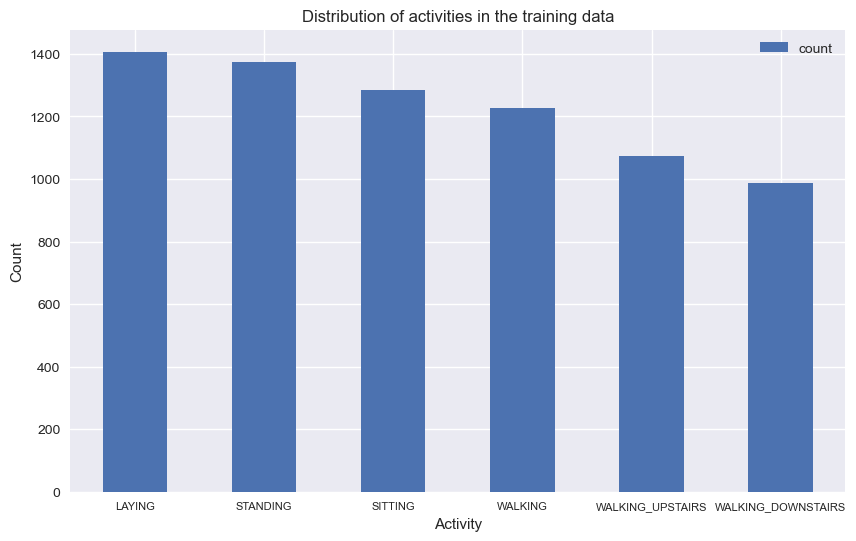

In [14]:
df['Activity'].value_counts().plot(kind = "bar",
    figsize = (10,6))
plt.title("Distribution of activities in the training data")
plt.xlabel("Activity")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation = 0, fontsize = 8)
plt.show()

In [15]:
df["tBodyAcc-mean()-X"]

0       0.288585
1       0.278419
2       0.279653
3       0.279174
4       0.276629
          ...   
7347    0.299665
7348    0.273853
7349    0.273387
7350    0.289654
7351    0.351503
Name: tBodyAcc-mean()-X, Length: 7352, dtype: float64

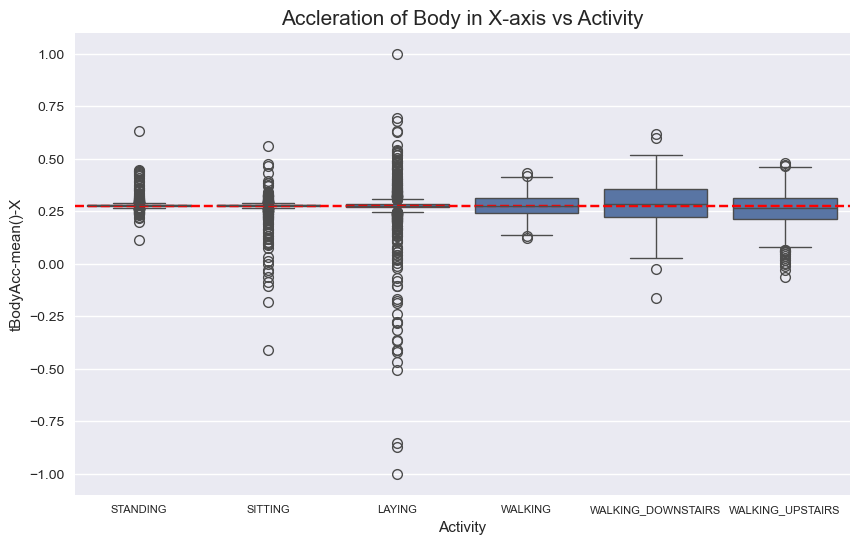

Mean: 0.27448812496352015


In [16]:
# Plot for Accleration of body vs Activity
plt.figure(figsize= (10, 6))
sns.boxplot( x = "Activity", y = "tBodyAcc-mean()-X", data = df)
plt.xticks(fontsize = 8)
plt.title("Accleration of Body in X-axis vs Activity", fontsize="15")
plt.axhline(df['tBodyAcc-mean()-X'].mean(), color = 'r', linestyle = '--')
plt.show()
print(f"Mean: {df['tBodyAcc-mean()-X'].mean()}")

>The above plot shows us a clear difference between activities in which person is moving (Walking, Walking_downstairs, walking_upstairs) and activities in which they are still(standing, sitting, lying).

>This plot is strong evidence that our machine learning model will be able to learn the difference between static and dynamic activities.

In [17]:
df["tGravityAcc-mean()-Y"]

0      -0.140840
1      -0.141551
2      -0.142010
3      -0.143976
4      -0.148750
          ...   
7347   -0.222004
7348   -0.242054
7349   -0.236950
7350   -0.233230
7351   -0.233292
Name: tGravityAcc-mean()-Y, Length: 7352, dtype: float64

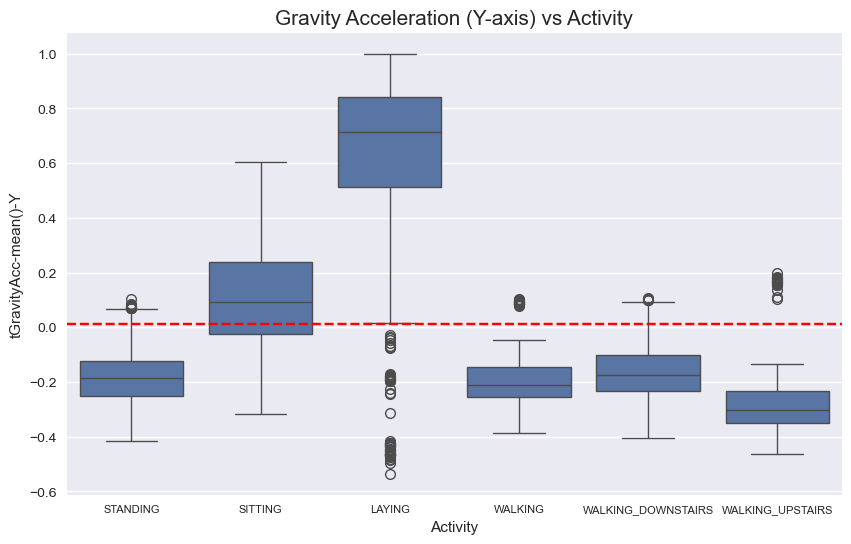

In [18]:
# Plot for gravity vs Activity
plt.figure(figsize = (10, 6))
sns.boxplot(x = "Activity", y = "tGravityAcc-mean()-Y", data = df)
plt.title("Gravity Acceleration (Y-axis) vs Activity", fontsize="15")
plt.xticks(fontsize=8)
plt.axhline(df["tGravityAcc-mean()-Y"].mean(), c = 'r', linestyle = '--')
plt.show()

>This plot reveals that the feature `tGravityAcc-mean()-Y` is a nearly perfect separator for the activities `WALKING_UPSTAIRS` and `WALKING_DOWNSTAIRS`. Look at the boxes for these two activities—their ranges (the boxes and whiskers) have very less overlap. A machine learning model will find it very easy to distinguish between these two activities using this feature alone.

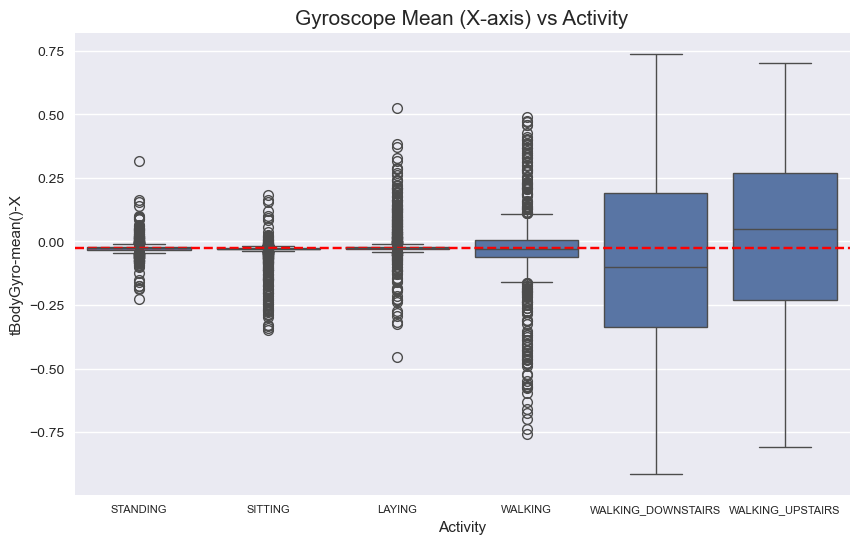

In [19]:
# Plot for Gyro mean vs Activity
plt.figure(figsize = (10, 6))
sns.boxplot(x = "Activity", y = "tBodyGyro-mean()-X", data = df)
plt.title("Gyroscope Mean (X-axis) vs Activity", fontsize="15")
plt.xticks(fontsize=8)
plt.axhline(df["tBodyGyro-mean()-X"].mean(), c = 'r', linestyle = '--')
plt.show()

> As we can see, the rotational velocity for all three static activities is tightly clustered around zero. The dynamic activities show much more variance, it confirms that the gyroscope data is very useful for separating static from dynamic motion.

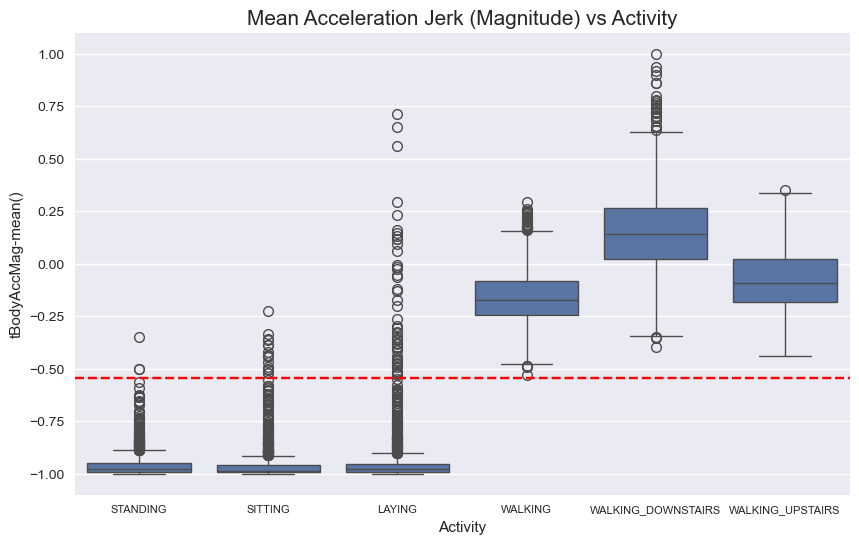

In [20]:
# Plot Mean Acceleration Jerk (Magnitude) vs Activity
plt.figure(figsize = (10, 6))
sns.boxplot(x = "Activity", y = "tBodyAccMag-mean()", data = df)
plt.title("Mean Acceleration Jerk (Magnitude) vs Activity", fontsize="15")
plt.xticks(fontsize=8)
plt.axhline(df["tBodyAccMag-mean()"].mean(), c = 'r', linestyle = '--')
plt.show()

>Static activities have almost zero jerk. Dynamic activities have significantly higher jerk values. This feature helps us seperate the walking activities to still ones.

### t-SNE

Now we are going to use t-SNE for finding the relation between all 561 features.

In [21]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
X_sample = df.drop(['Activity'], axis=1)
y_sample = df['Activity']

scaler = StandardScaler()

# Scale the sample
X_sample_scaled = scaler.fit_transform(X_sample)

# n_components=2: Because we wanted to create a 2D-plot
tsne = TSNE(n_components = 2,  perplexity=40)
tsne_results = tsne.fit_transform(X_sample_scaled)

In [22]:
tsne_results

array([[-26.5076  , -20.258104],
       [-26.321278, -17.235596],
       [-27.338211, -17.612192],
       ...,
       [ 12.900887, -60.379807],
       [ 12.809641, -60.29711 ],
       [ 12.210549, -59.60776 ]], shape=(7352, 2), dtype=float32)

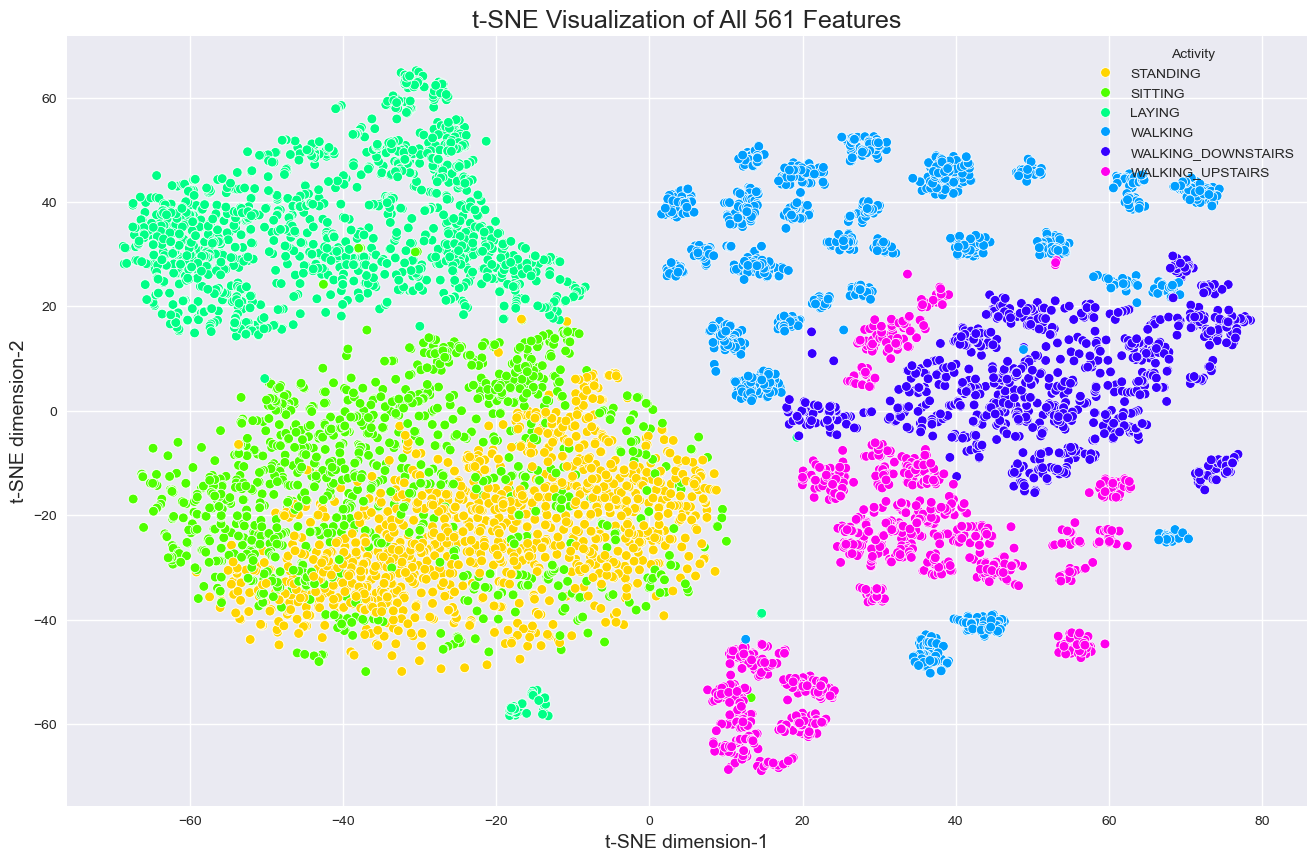

In [23]:
# Now plot the scatter plot
plt.figure(figsize = (16,10))
sns.scatterplot(x=tsne_results[:, 0],
               y = tsne_results[:, 1],
               hue = y_sample,
               palette = sns.color_palette("hsv", 6),
               legend = "full")

plt.title("t-SNE Visualization of All 561 Features", fontsize = 18)
plt.xlabel("t-SNE dimension-1", fontsize = 14)
plt.ylabel("t-SNE dimension-2", fontsize = 14)
plt.legend(title = "Activity", loc='upper right')
plt.grid(True)
plt.savefig("TSNE visualization of all features HAR")
plt.show();

>The activities form distinct, well-separated clusters. This is the best possible outcome and is strong evidence that a machine learning model will be able to learn the boundaries between the different activities.

> The `SITTING` and `STANDING` activites clusters are very close, which confirms out early hypothesis that these two activities will be hardest to distinguish.

## Part-2: Data Preprocessing

In [24]:
train_df = pd.read_csv("train.csv") 
test_df = pd.read_csv("test.csv")

In [25]:
y_train = train_df["Activity"]
y_test = test_df["Activity"]
y_train

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

In [183]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
# For training data
label_enc = LabelEncoder()
y_train_transformed = label_enc.fit_transform(y_train)
y_train_transformed

array([2, 2, 2, ..., 5, 5, 5], shape=(7352,))

In [185]:
# For test data
y_test_transformed = label_enc.fit_transform(y_test)
y_test_transformed

array([2, 2, 2, ..., 5, 5, 5], shape=(2947,))

> Now we'll import the train and test data and then we'll use StandardScaler() to scale the features

In [34]:
# Now we'll drop subject and activity
X_train = train_df.drop((["subject", "Activity"]),axis = 1)
X_test = test_df.drop((["subject", "Activity"]), axis = 1)
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [35]:
X_test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [42]:
# Now we'll apply feature scaling to all transform the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled

array([[ 0.20064157, -0.0636826 , -0.41962845, ..., -0.68721921,
         0.40794614, -0.00756789],
       [ 0.05594788,  0.03148567, -0.25390836, ..., -0.694138  ,
         0.40911698,  0.00787517],
       [ 0.07351535, -0.04341648, -0.07629468, ..., -0.702239  ,
         0.4102883 ,  0.02650234],
       ...,
       [-0.01566765,  0.0167814 ,  1.13222107, ..., -0.56584847,
         0.64059683,  0.34870928],
       [ 0.21586648, -0.02812252, -0.86770988, ..., -0.57766781,
         0.63147758,  0.29327564],
       [ 1.09620157,  0.12919873, -1.67268082, ..., -0.57392691,
         0.63274259,  0.33396081]], shape=(7352, 561))

In [37]:
# Create a new dataframe to view the scaled data
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_train_scaled_df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,-0.795359,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,0.130614,-0.897357,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,1.152336,-0.260878,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,1.112769,0.591045,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.149577,-0.138515,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.358361,-0.967904,-1.273005,0.913859,1.095963,1.628612,0.821169,1.174137,1.609686,1.247727,...,-0.778758,-0.876738,-0.829197,-0.591277,1.846034,0.325923,-0.878008,-0.590763,0.605162,0.380984
7348,-0.009044,0.243731,-0.676787,0.824887,1.026150,1.586100,0.726245,1.023755,1.658407,1.076279,...,0.159241,-0.260847,-0.180290,0.166951,1.948561,-1.459501,0.849894,-0.551598,0.652468,0.381820
7349,-0.015668,0.016781,1.132221,0.862975,0.810002,2.100249,0.768781,0.880813,2.266963,0.941403,...,0.277877,1.034784,1.044548,0.131018,-0.599877,1.406760,1.479571,-0.565848,0.640597,0.348709
7350,0.215866,-0.028123,-0.867710,0.860922,0.794902,2.086778,0.754697,0.944019,2.235301,1.047375,...,-0.443978,1.155541,0.913569,-0.326769,1.558312,1.525574,-1.220854,-0.577668,0.631478,0.293276


#### Using `PCA(Principle Component Analysis)` dimensionality reduction

In [217]:
from sklearn.decomposition import PCA

np.random.seed(42)
# Initialise PCA, telling it to keep 95% of varience
pca = PCA(n_components = 0.95)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [218]:
X_test_pca.shape

(2947, 102)

In [219]:
X_train_pca.shape
# Here the features are reduced from 561 to 102

(7352, 102)

## Part-3 Model training and Evaluation
> First we'll train the model on `LogisticRegression()` and `RandomForestClassifier()` then in the experrimentation section we'll try some more models to  see wheather they are good enough or not.


To check wheather the training and testing data is scaled properly:
* If yes, then `mean` will be tending to 0 and `std` will be tending to 1

In [147]:
pd.DataFrame(X_train_scaled).describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
0,7352.0,-3.131336e-16,1.000068,-18.140487,-0.163869,0.038505,0.198885,10.326608
1,7352.0,4.783986e-17,1.000068,-24.071521,-0.175643,0.011671,0.169391,24.938779
2,7352.0,8.698156e-17,1.000068,-15.730849,-0.209280,0.008207,0.200374,19.585288
3,7352.0,-1.507680e-16,1.000068,-0.879336,-0.863187,-0.759427,0.808163,3.577947
4,7352.0,0.000000e+00,1.000068,-0.972792,-0.929530,-0.678376,0.948462,2.839526
5,7352.0,2.938044e-16,1.000068,-0.944079,-0.896864,-0.608159,0.817705,3.833088
6,7352.0,3.865847e-17,1.000068,-0.871344,-0.856229,-0.755104,0.796691,3.845150
7,7352.0,-9.278034e-17,1.000068,-0.973625,-0.928682,-0.680006,0.947105,3.075829
8,7352.0,5.412186e-17,1.000068,-0.951112,-0.903420,-0.606125,0.822228,3.878713
9,7352.0,1.932924e-17,1.000068,-0.975917,-0.858781,-0.758542,0.829141,2.697113


##### 1. `LogisticRegression()`  -  baseline model.

In [220]:
# Training the baseline model: LinearRegression
from sklearn.linear_model import LogisticRegression

np.random.seed(42)

lr_model = LogisticRegression(max_iter= 3000,
                             solver = 'lbfgs')

# Fitting the model with pca training data
lr_model.fit(X_train_pca, y_train_transformed)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,3000
,multi_class,'deprecated'


In [279]:
lr_model_score = lr_model.score(X_train_pca, y_train_transformed)
lr_model_score

0.9828618063112078

In [230]:
# Importing the evaluation metrics 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions with scaled test data
lr_preds = lr_model.predict(X_test_pca)
lr_preds

array([2, 2, 2, ..., 5, 5, 5], shape=(2947,))

In [252]:
# Accuracy
lr_accuracy = accuracy_score(y_test_transformed, lr_preds)
print(f" Logistic Regression model accuracy: {lr_accuracy*100:.2f}%")

 Logistic Regression model accuracy: 93.86%


In [232]:
# Classification report
print(classification_report(y_test_transformed, lr_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.89      0.92      0.90       491
           2       0.93      0.90      0.91       532
           3       0.96      0.95      0.96       496
           4       0.92      0.94      0.93       420
           5       0.93      0.92      0.93       471

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



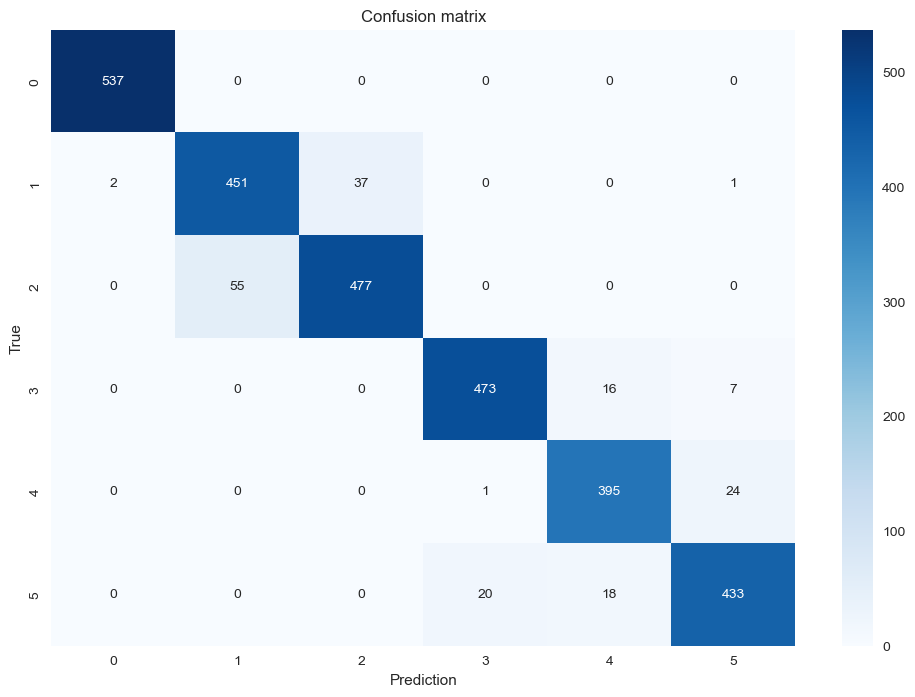

<Figure size 800x550 with 0 Axes>

In [243]:
# Confusion matrix
import seaborn as sns

# Creating comfusion matrix
cm = confusion_matrix(y_test_transformed, lr_preds)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot= True, cmap='Blues', fmt='d') # fmt="d" forces integers
plt.title("Confusion matrix")
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show();
plt.savefig("Confusion matrix of Logistic Regression.png")

In [245]:
# Cross val score
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr_model, 
                            X_train_pca, 
                            y_train_transformed, 
                            cv=5, 
                            scoring='accuracy')

print("CV Accuracy:", cv_scores.mean())

CV Accuracy: 0.9219326942197682


##### 2. `RadomForestCassifier()` - Advance model

>Till here we've done everything except the hyperparameter tuning on logistic regression.
>Now we'll also check `RandomForestCassifier()` model

In [249]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
rf_model = RandomForestClassifier()

rf_model.fit(X_train_pca, y_train_transformed)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [293]:
rf_model_score = rf_model.score(X_train_pca, y_train_transformed)
rf_model_score

1.0

#### `RandomForestClassifier()` model evaluation:

In [250]:
rf_preds = rf_model.predict(X_test_pca)
rf_preds

array([2, 2, 2, ..., 5, 5, 3], shape=(2947,))

In [251]:
# Accuracy
rf_acc = accuracy_score(y_test_transformed, rf_preds)
print(f"Random forest model accuracy: {rf_acc *100: .2f}%")

Random forest model accuracy:  89.14%


In [253]:
# Classification report
print(classification_report(y_test_transformed, rf_preds))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       537
           1       0.86      0.81      0.83       491
           2       0.84      0.91      0.87       532
           3       0.87      0.93      0.90       496
           4       0.89      0.78      0.83       420
           5       0.90      0.93      0.91       471

    accuracy                           0.89      2947
   macro avg       0.89      0.89      0.89      2947
weighted avg       0.89      0.89      0.89      2947



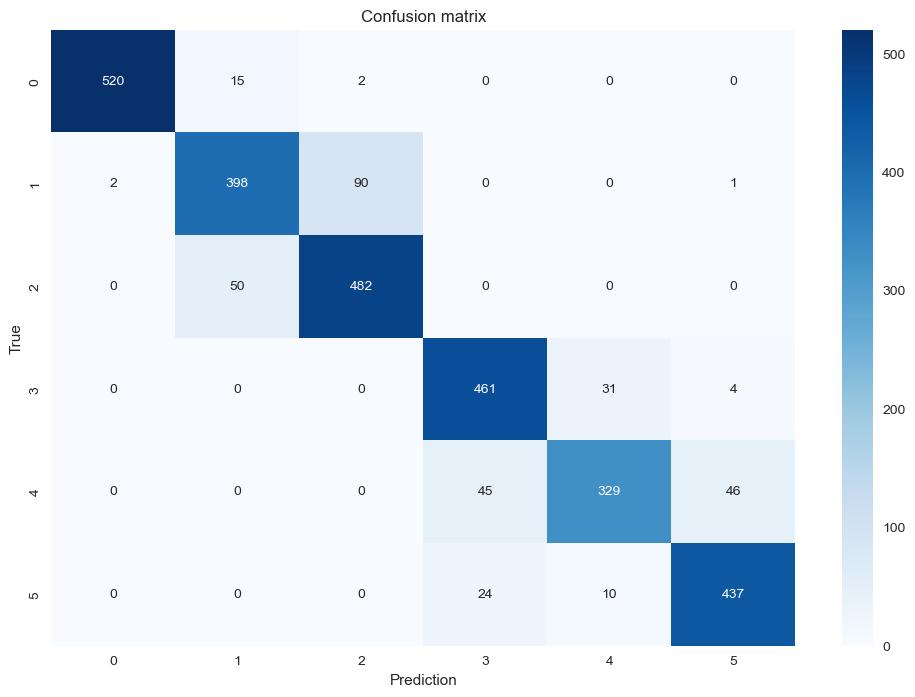

<Figure size 800x550 with 0 Axes>

In [254]:
# Confusion matrix
cm = confusion_matrix(y_test_transformed, rf_preds)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot= True, cmap='Blues', fmt='d') # fmt="d" forces integers
plt.title("Confusion matrix")
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show();
plt.savefig("Confusion matrix of RandomForest classifier.png")

In [258]:
cv_scores = cross_val_score(rf_model,
                           X_train_pca,
                           y_train_transformed,
                           cv=5,
                           scoring = "accuracy")

print("CV score: ", cv_scores.mean())

CV score:  0.8573185902505122


So, till here we figured out that `LogisticRegression` model is more accurate than the `RandomForestClassifier` model.

>Therefore, next we'll try to tune the hyperparameter to make the predictions more accurate.

## Part-4 Hyperparameter Tuning

1. Tuning the `LogisticRegression()` model

In [259]:
lr_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 3000,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [267]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

# Parameter grid
param_grid = {
    'C' : [0.01, 0.1, 1, 10, 100],
    'solver' : ['lbfgs', 'saga'],
    'penalty' : ['l2'],
    'class_weight' : [None, 'balanced'],
    'max_iter' : [3000]
}

# grid search setup 
grid_search = GridSearchCV(
                        estimator = lr_model,
                        param_grid = param_grid,
                        cv = 5,
                        verbose =1,
                        n_jobs = -1)

grid_search.fit(X_train_pca, y_train_transformed)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegre...max_iter=3000)
,param_grid,"{'C': [0.01, 0.1, ...], 'class_weight': [None, 'balanced'], 'max_iter': [3000], 'penalty': ['l2'], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [269]:
grid_search.best_params_

{'C': 1,
 'class_weight': 'balanced',
 'max_iter': 3000,
 'penalty': 'l2',
 'solver': 'lbfgs'}

> Now, we know  the best parameters, so we'll now train thew model on these parameters to  get the best output

In [274]:
# Training the LogisticRegression model on best parameters

np.random.seed(42)

lr_model_tuned = LogisticRegression(
    C = 1,
    class_weight = 'balanced',
    max_iter = 3000,
    penalty = 'l2',
    solver = 'lbfgs'
)

lr_model_tuned.fit(X_train_pca, y_train_transformed)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,3000
,multi_class,'deprecated'


In [275]:
lr_model_score = lr_model_tuned.score(X_train_pca, y_train_transformed)
lr_model_score

0.9831338411316648

In [277]:
# Importing the evaluation metrics 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions with scaled test data
lr_preds = lr_model_tuned.predict(X_test_pca)
lr_preds

array([2, 2, 2, ..., 5, 5, 5], shape=(2947,))

In [278]:
# Accuracy
lr_accuracy = accuracy_score(y_test_transformed, lr_preds)
print(f" Logistic Regression model accuracy: {lr_accuracy*100:.2f}%")

 Logistic Regression model accuracy: 93.76%


In [280]:
# Classification report
print(classification_report(y_test_transformed, lr_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.89      0.92      0.90       491
           2       0.93      0.89      0.91       532
           3       0.96      0.95      0.95       496
           4       0.92      0.94      0.93       420
           5       0.93      0.92      0.93       471

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



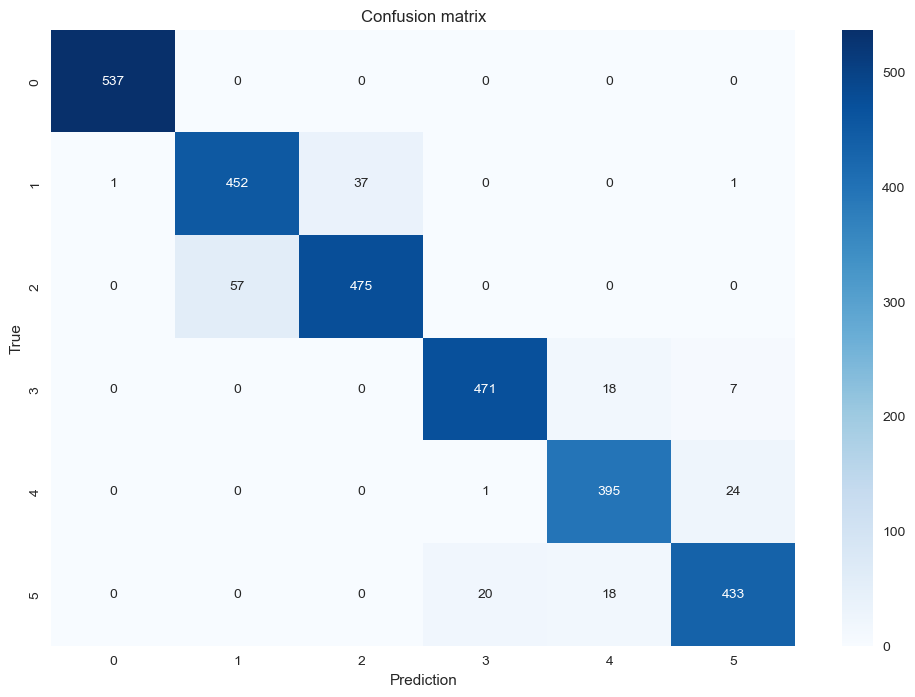

<Figure size 800x550 with 0 Axes>

In [281]:
# Confusion matrix
import seaborn as sns

# Creating comfusion matrix
cm = confusion_matrix(y_test_transformed, lr_preds)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot= True, cmap='Blues', fmt='d') # fmt="d" forces integers
plt.title("Confusion matrix")
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show();
plt.savefig("Confusion matrix of Logistic Regression Tuned.png")

In [282]:
cv_scores = cross_val_score(rf_model,
                           X_train_pca,
                           y_train_transformed,
                           cv=5,
                           scoring = "accuracy")

print("CV score: ", cv_scores.mean())

CV score:  0.8584061932046783


#### 2. Tuning the `RandomForestClassifier()` model

In [272]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [270]:
np.random.seed(42)

# Parameter grid
param_grid = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [None, 10, 20],
    'min_samples_split' : [2, 5],
    'min_samples_leaf' :[1,2],
    'max_features' : ['sqrt', 'log2'],
    'bootstrap' : [True, False] 
}

# grid search setup
grid_search = GridSearchCV(
    estimator = rf_model,
    param_grid = param_grid,
    cv = 5,
    verbose = 1,
    n_jobs = -1
)

grid_search.fit(X_train_pca, y_train_transformed)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [271]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [283]:
# Training the RandomForestClassifier on best parameters

np.random.seed(42)

rf_model_tuned = RandomForestClassifier(
             bootstrap =  False,
             max_depth = None,
             max_features = 'log2',
             min_samples_leaf = 2,
             min_samples_split = 5,
             n_estimators = 200
)

rf_model_tuned.fit(X_train_pca, y_train_transformed)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [284]:
rf_model_score = rf_model_tuned.score(X_train_pca, y_train_transformed)
rf_model_score

1.0

In [285]:
# Making predictions
rf_preds = rf_model_tuned.predict(X_test_pca)
rf_preds

array([2, 2, 2, ..., 4, 5, 3], shape=(2947,))

In [286]:
# Accuracy
rf_acc = accuracy_score(y_test_transformed, rf_preds)
print(f"Random forest model accuracy: {rf_acc *100: .2f}%")

Random forest model accuracy:  90.57%


In [288]:
# Classification report
print(classification_report(y_test_transformed, rf_preds))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       537
           1       0.88      0.82      0.85       491
           2       0.86      0.93      0.89       532
           3       0.91      0.93      0.92       496
           4       0.87      0.84      0.86       420
           5       0.91      0.93      0.92       471

    accuracy                           0.91      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.91      0.91      0.91      2947



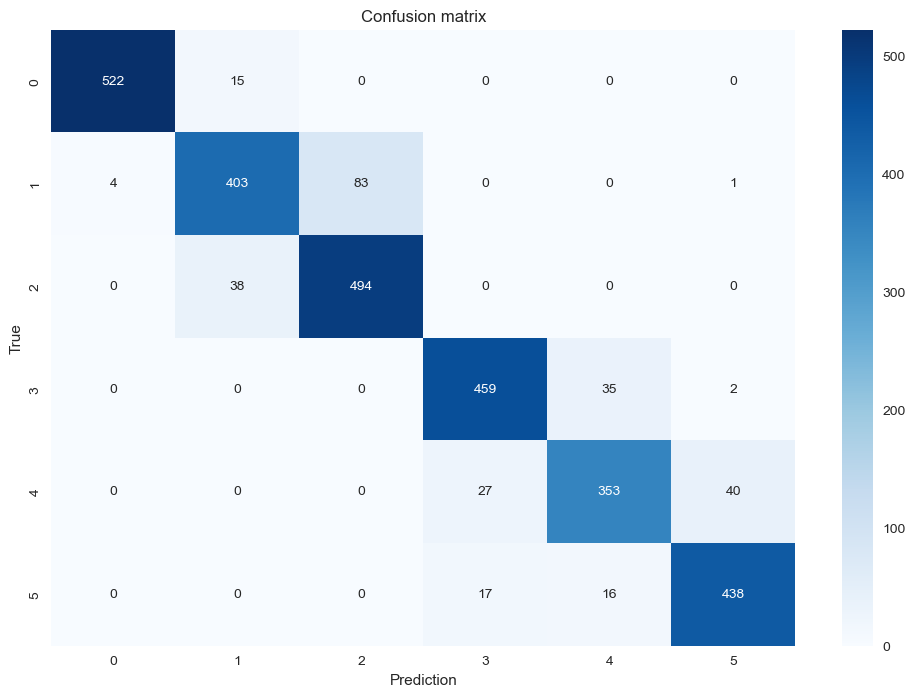

<Figure size 800x550 with 0 Axes>

In [289]:
# Confusion matrix
cm = confusion_matrix(y_test_transformed, rf_preds)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot= True, cmap='Blues', fmt='d') # fmt="d" forces integers
plt.title("Confusion matrix")
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show();
plt.savefig("Confusion matrix of RandomForest classifier.png")

In [290]:
cv_scores = cross_val_score(rf_model,
                           X_train_pca,
                           y_train_transformed,
                           cv=5,
                           scoring = "accuracy")

print("CV score: ", cv_scores.mean())

CV score:  0.8535112862276113


## Model Performance Comparison

| Model                          | Train Score | Test Accuracy | CV Score | Precision (Macro Avg) | Recall (Macro Avg) | F1-Score (Macro Avg) | Notes |
|--------------------------------|-------------|---------------|----------|------------------------|---------------------|-----------------------|-------|
| Logistic Regression (Base)     | 0.9829      | **93.86%**    | **0.9219** | 0.94                   | 0.94                | 0.94                  | Best overall performance, strong generalization |
| Random Forest (Base)           | 1.0000      | 89.14%        | 0.8573   | 0.89                   | 0.89                | 0.89                  | Overfits (perfect train score, lower test/CV) |
| Logistic Regression (Tuned)    | 0.9831      | 93.76%        | 0.8584   | 0.94                   | 0.94                | 0.94                  | Similar to base LR, CV dropped slightly |
| Random Forest (Tuned)          | 1.0000      | 90.57%        | 0.8535   | 0.90                   | 0.90                | 0.90                  | Slightly better than base RF, still overfitting |

## Part-5 Experimentation

> So i've tried `LogisticRegression` and `RandomForestClassifier` model, and also i have tried tuning the hyperparameter tuning but the highest accuracy got was 93.86%. which is lower than our target accuracy i.e. more than 95%. So, now we'll try `XGBoostClassifier` model and try to achieve the target accuracy.

In [295]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 368.6 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [322]:
from xgboost import XGBClassifier

np.random.seed(42)
xgb_model = XGBClassifier(eval_metric='mlogloss')

xgb_model.fit(X_train_pca, y_train_transformed)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [324]:
xgb_model_score = xgb_model.score(X_train_pca, y_train_transformed)
xgb_model_score

1.0

In [323]:
xgb_preds = xgb_model.predict(X_test_pca)
xgb_preds

array([2, 2, 2, ..., 5, 5, 3], shape=(2947,))

In [325]:
# Accuracy
rf_acc = accuracy_score(y_test_transformed, rf_preds)
print(f"XGB model accuracy: {rf_acc *100: .2f}%")

XGB model accuracy:  90.57%


#### Hyperparameter tuning for `XGBClassifier`

In [307]:
# Now i'll find the best parameters for this model
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.5, 1, 1.5, 2],             # L2 regularization
    
}

# Setting up grid search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    n_iter = 200
)

random_search.fit(X_train_pca, y_train_transformed)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.6, 0.8, ...], 'gamma': [0, 1, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 5, ...], ...}"
,n_iter,200
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [321]:
random_search.best_params_

{'subsample': 0.6,
 'reg_lambda': 1.5,
 'reg_alpha': 0,
 'n_estimators': 500,
 'max_depth': 3,
 'learning_rate': 0.2,
 'gamma': 0,
 'colsample_bytree': 0.6}

In [327]:
# Now we'll apply Grid Search to find the best params among them

np.random.seed(42)
param_grid = {
    
    'learning_rate': [0.15, 0.2, 0.25],  
    'n_estimators': [450, 500, 550],     
    'subsample': [0.6],                  
    'colsample_bytree': [0.6],           
    'reg_lambda': [1.0, 1.5, 2.0],       
    'reg_alpha': [0, 0.1],               
    'max_depth': [3],                    
    'gamma': [0, 0.1]    
}

# Setting up grid search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_pca, y_train_transformed)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.6], 'gamma': [0, 0.1], 'learning_rate': [0.15, 0.2, ...], 'max_depth': [3], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'multi:softprob'


In [328]:
grid_search.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0,
 'learning_rate': 0.25,
 'max_depth': 3,
 'n_estimators': 550,
 'reg_alpha': 0,
 'reg_lambda': 1.5,
 'subsample': 0.6}

In [341]:
# Now we'll apply Grid Search to find the best params among them

np.random.seed(42)
param_grid = {
    
    'learning_rate': [0.2, 0.25, 0.3],   # fine-tune around 0.25
    'n_estimators': [ 525, 550, 600],       # expand slightly around 550
    'reg_lambda': [1.5, 1.8],              # check near 1.5
    'reg_alpha': [0, 0.05, 0.1],                # closer refinement
    'gamma': [0, 0.2, 0.5],               # slightly broader
    'max_depth': [3, 4]                         # test if 4 gives boost
}

# Setting up grid search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_pca, y_train_transformed)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'gamma': [0, 0.2, ...], 'learning_rate': [0.2, 0.25, ...], 'max_depth': [3, 4], 'n_estimators': [525, 550, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'multi:softprob'


In [342]:
np.random.seed(42)

xgb_model_tuned = XGBClassifier(
             colsample_bytree = 0.6,
             gamma = 0,
             learning_rate = 0.25,
             max_depth = 3,
             n_estimators = 550,
             reg_alpha = 0,
             reg_lambda = 1.5,
             subsample = 0.6
)

xgb_model_tuned.fit(X_train_pca, y_train_transformed)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.6
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [348]:
# Making predictions
xgb_preds = xgb_model_tuned.predict(X_test_pca)
xgb_preds

array([2, 2, 2, ..., 5, 5, 3], shape=(2947,))

In [350]:
# Accuracy
xgb_acc = accuracy_score(y_test_transformed, xgb_preds)
print(f"XGB model accuracy: {xgb_acc *100: .2f}%")

XGB model accuracy:  94.16%


In [345]:
# Classification report
print(classification_report(y_test_transformed, xgb_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       537
           1       0.91      0.89      0.90       491
           2       0.90      0.92      0.91       532
           3       0.96      0.97      0.96       496
           4       0.95      0.90      0.93       420
           5       0.93      0.97      0.95       471

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



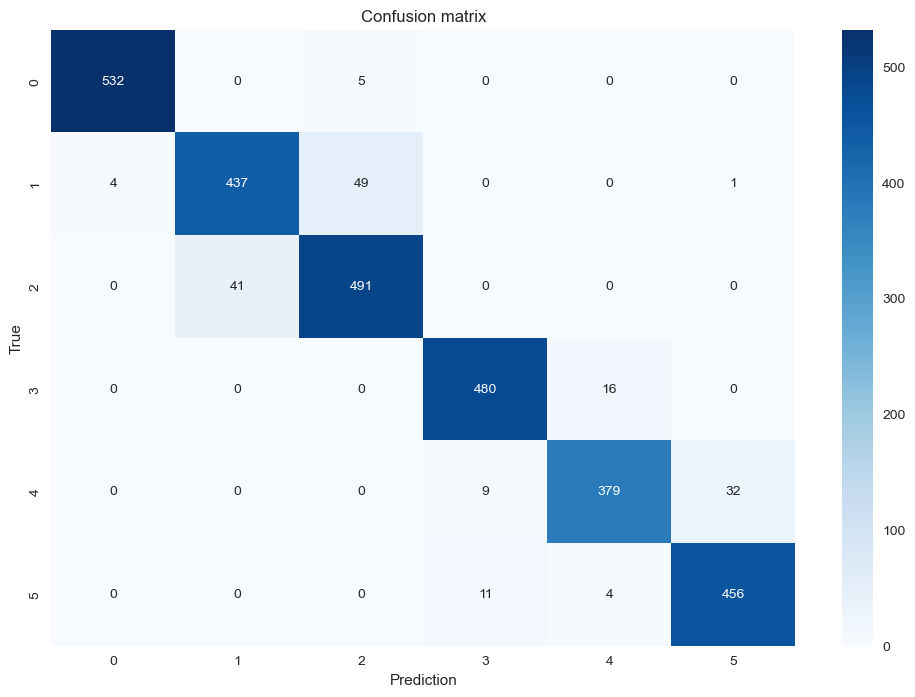

<Figure size 800x550 with 0 Axes>

In [346]:
# Confusion matrix
cm = confusion_matrix(y_test_transformed, xgb_preds)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot= True, cmap='Blues', fmt='d') # fmt="d" forces integers
plt.title("Confusion matrix")
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show();
plt.savefig("Confusion matrix of Logistic Regression Tuned.png")

In [347]:
cv_scores = cross_val_score(xgb_model,
                           X_train_pca,
                           y_train_transformed,
                           cv=5,
                           scoring = "accuracy")

print("CV score: ", cv_scores.mean())

CV score:  0.8752762940662329
